# **Movie Recommendation using Graph Social Network Analysis** 

In [1]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

url = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
with urlopen(url) as zurl:
    with ZipFile(BytesIO(zurl.read())) as zfile:
        zfile.extractall('.')

## Data preparation

In [1]:
import pandas as pd

ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'])
ratings.head()


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [2]:
users = pd.read_csv('ml-100k/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation','zipcode'])
users.head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
movies = pd.read_csv('ml-100k/u.item', sep='|', usecols=range(23), names=['movie_id', 'title', 'release date','year', 'IMDB URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], encoding='latin-1')
movies.head()

,movie_id,title,release date,year,IMDB URL,unknown,Action,Adventure,Animation,Children,...,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


## Building the User-Movie Rating Matrix

In [4]:
user_movie = ratings.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)
user_movie.head()


movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Graph SNA 
> Nodes are users and connection between these nodes will be based on the similarity of their movie ratings from user_movie table
- Determine similarity/connection by calculate the pairwise distances between user's rating
- Use Euclidean distance to calculate pairwise distances for every pair between users
- Set threshold using average distance. 
    - If pairwise distance <= average distance then there will be edge between users

<div class="alert alert-block alert-warning">
<b>Example with user rating:</b>
- User 1 has rated movies 1 to 5 as [0, 1, 2, 5, 2].
- User 2 has rated movies 1 to 5 as [0, 1, 1, 4, 2]. <br>
To calculate the Euclidean distance between User 1 and User 2:

1. Subtract the ratings of User 2 from User 1 for each movie.
    - Differences for each movie: [0-0, 1-1, 2-1, 5-4, 2-2] = [0, 0, 1, 1, 0].
2. Square each of these differences: [0^2, 0^2, 1^2, 1^2, 0^2] = [0, 0, 1, 1, 0]
3. Sum up all the squared differences. 0 + 0 + 1 + 1 + 0 = 2
4. Square root of this sum: sqrt(2) <br>

Euclidean distance between user 1 and user 2: sqrt(2)
</div>



Number of nodes:
943

Number of edges:
277210


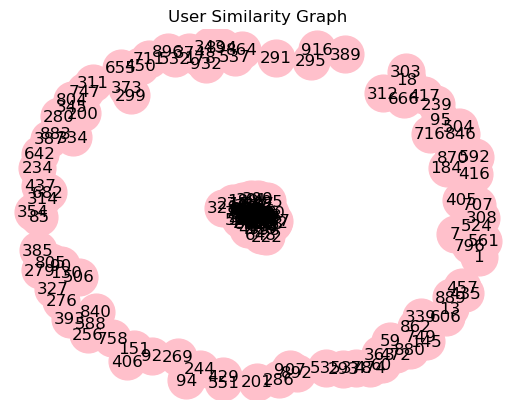

In [5]:
import networkx as nx
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt


distances = pdist(user_movie.values, metric='euclidean')
distance_matrix = squareform(distances)
average_distance = np.mean(distances)
average_distance

threshold = 1.1 * average_distance  # 101% of average distance

G = nx.Graph()

# Add nodes for each user
for user in user_movie.index:
    G.add_node(user)

# Add edges based on the threshold
for i, user1 in enumerate(user_movie.index):
    for j, user2 in enumerate(user_movie.index):
        if i < j and distance_matrix[i, j] <= threshold:
            G.add_edge(user1, user2)


print("\nNumber of nodes:")
print(G.number_of_nodes())

print("\nNumber of edges:")
print(G.number_of_edges())

pos = nx.spring_layout(G)  # positions for all nodes

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='pink')

# Edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='blue')

# Labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.title("User Similarity Graph")
plt.axis('off')  # Turn off the axis
plt.show()

# Create Graph where nodes are users and edges are relationship base on personal propensity of users such as age, gender, occupation 
# G = nx.Graph()
# # Add nodes to each user
# G.add_nodes_from(users['user_id'].unique())
# relationship_table = pd.DataFrame(0, index=users['user_id'], columns=users['user_id'])


# # Add edges between users with same occupation and gender
# user_occupation = users['occupation'].unique()
# user_gender = ['M','F']
# for occupation in user_occupation:
#     for gender in user_gender:
#         # get subset of users with same occupation and gender
#         sub_df = users[(users['occupation'] == occupation) & (users['gender'] == gender)]
#         # create edge between all users in subset
#         for user1 in sub_df['user_id']:
#             for user2 in sub_df['user_id']:
#                 if user1 < user2: # If users have the same occupation and gender then there is connection between them. (edges without duplicates) 
#                     G.add_edge(user1, user2)
#                     # Debug: Print the connection if occupation is student and gender is Female
#                     if occupation == "student" and gender == "F":
#                         print(f"Edge added between User {user1} and User {user2} - Occupation: {occupation}, Gender: {gender}")

# # debug
# print("\nNumber of nodes:")
# print(G.number_of_nodes())

# print("\nNumber of edges:")
# print(G.number_of_edges())
                    


###  COMMUNITY DETECTION. 
#### Applying the Louvain Method to identify communities based on modularity optimization. </br> It can provide significant insights into the structure and characteristics of your network </br>
#### Insight from graph: low modulairy score: 0.02 < 1. This graph doesn't have strong community structure

c:\Users\traml\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


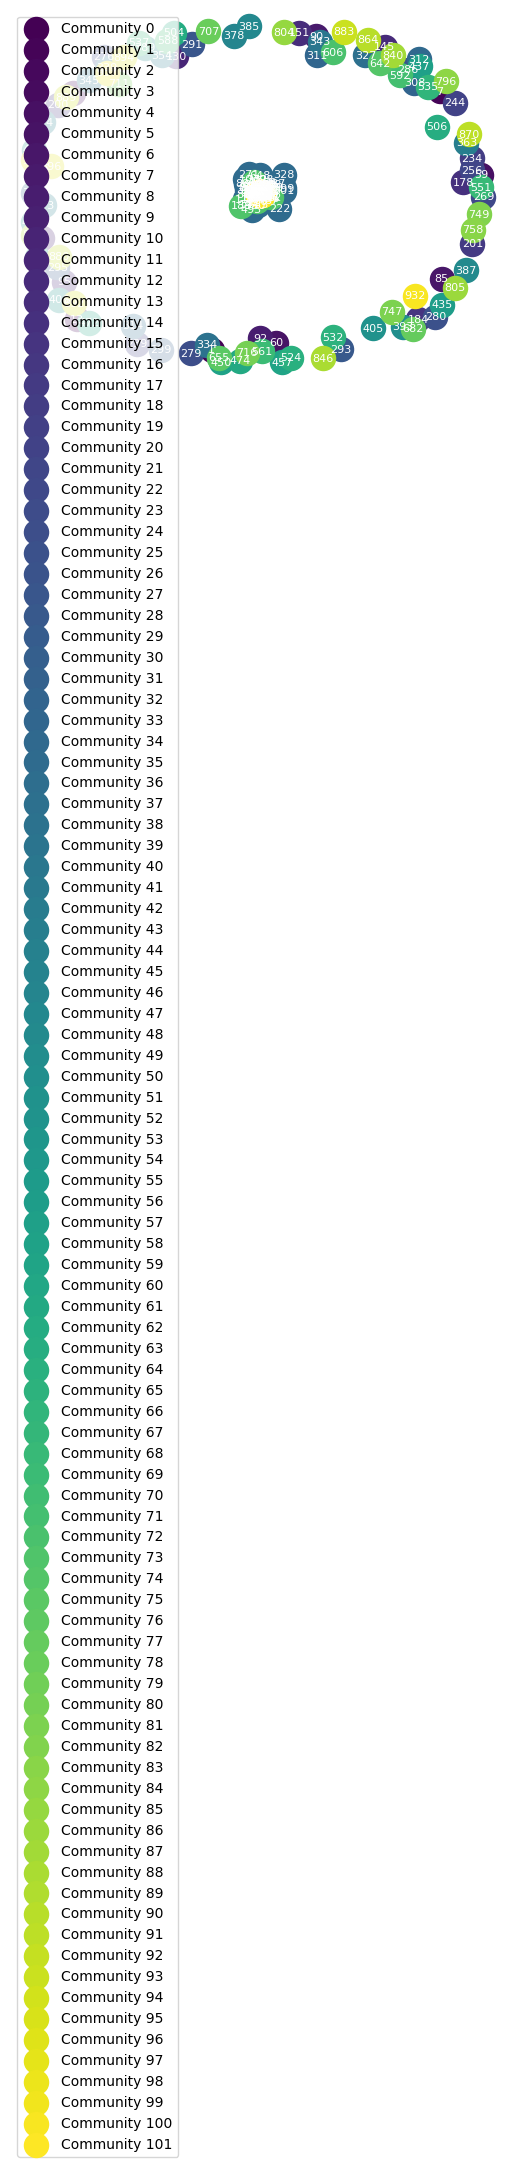

Modularity: 0.02
Number of communities detected: 102


In [6]:

communities = nx.community.louvain_communities(G)
modularity = nx.community.modularity(G, communities=communities)

# Function to draw the communities
def draw_communities(G, communities):
    # Use the spring layout for node positioning
    pos = nx.spring_layout(G)

    # Create a color map with a color for each community
    cmap = plt.cm.viridis
    community_colors = [cmap(i) for i in np.linspace(0, 1, len(communities))]

    # Draw the nodes, coloring them by community
    for i, community in enumerate(communities):
        node_list = list(community)
        node_color = community_colors[i]
        nx.draw_networkx_nodes(G, pos, nodelist=node_list, node_color=node_color, label=f"Community {i}")

    # Draw the edges
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)

    # Draw node labels
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='white')

    # Show the legend
    plt.legend(scatterpoints=1)

    # Show the plot
    plt.axis('off')
    plt.show()

# Call the function to draw the communities
draw_communities(G, communities)
print(f"Modularity: {modularity:.2f}")
print(f"Number of communities detected: {len(communities)}")


# Girvan-Newman method
# import itertools
# def draw_communities(G, communities):
#     cmap = plt.cm.get_cmap('viridis', max(len(c) for c in communities))
#     color_list = [cmap(i) for i in range(len(communities))]

#     node_color = []
#     for node in G.nodes():
#         for i, community in enumerate(communities):
#             if node in community:
#                 node_color.append(color_list[i])
#                 break

#     # Draw the graph
#     nx.draw(G, node_color=node_color, with_labels=True, edge_color='black')
    
# # Apply the Girvan-Newman algorithm to find the community structure
# comp = nx.community.girvan_newman(G)

# # Find the communities and modularity for each level of the algorithm
# k = 10
# modularities = []
# max_modularity = -1
# best_community = None

# for communities in itertools.islice(comp, k):
#     print("Communities at level:", len(modularities) + 2)
#     print(tuple(sorted(c) for c in communities))
#     modularity = nx.community.modularity(G, communities)
#     print("Modularity: {0:.2f}".format(modularity))
#     modularities.append(modularity)
#     if modularity > max_modularity:
#         max_modularity = modularity
#         best_community = communities

# # Draw the best community detection
# draw_communities(G, best_community)
# plt.title('Movie Best Community Based On Occupation and Gender')
# # Display the plot
# plt.show()

# # Plot the modularity as a function of the number of clusters
# plt.plot(range(2, k + 2), modularities)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Modularity')
# plt.xticks(range(2, k + 2))
# plt.show()



## Cosine similarity 
- Determining the best matching community for a new user based on gender and occupation. 
- Adding new user to group that has similarity personal information such as gender and age and the users in each detected community. Then add the new user to the community where they have the highest similarity score

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

users_df = pd.get_dummies(users[['gender', 'occupation']])

# New User's Information
new_users = [{'gender': 'F', 'occupation': 'student'},   # Tram | F | student
            {'gender': 'M', 'occupation': 'student'},    # Jarg | M | student
            {'gender': 'M', 'occupation': 'educator'},   # P.Wu | M | teacher
            {'gender': 'M', 'occupation': 'student'},    # Erik | M | student
            {'gender': 'F', 'occupation': 'student'},    # Pravi| F | student
            {'gender': 'F', 'occupation': 'educator'}    # P.Zhu| F | teacher
            ]

for new_user in new_users:    
    new_user_info = pd.DataFrame([new_user])
    new_user_encoded = pd.get_dummies(new_user_info)

    # Align columns of new_user_encoded with users_encoded
    new_user_encoded = new_user_encoded.reindex(columns=users_df.columns, fill_value=0)

    # Combine the existing data vs new data
    combined_data = pd.concat([users_df, new_user_encoded], ignore_index=True)

    # Compute cosine similarity
    similarity_matrix = cosine_similarity(combined_data)
    new_user_similarity = similarity_matrix[-1, :-1]  # Similarity of the new user with all others

    # print(f"Similarity scores of new user {new_user} with all others: {new_user_similarity}")

    # Determine the most similar community to new user
    community_similarity = {}
    for i, community in enumerate(communities):
        # Get indices of users in the community
        community_indices = [index for index, user in enumerate(users['user_id']) if user in community]
        # Calculate average similarity of the new user to this community
        community_similarity[i] = new_user_similarity[community_indices].mean()
       # print(f"Average similarity of new user with community {i:.2f}: {community_similarity}")


    # Find the community with the highest average similarity
    best_community_group = max(community_similarity, key=community_similarity.get)

    # Modify Community Structure
    # Add the new user to the identified community (assuming communities are sets)
    communities[best_community_group].add(max(users['user_id']) + 1)  # Assuming new user ID is the next integer
    
    print(f"New user {new_user} added to community {best_community_group}")



New user {'gender': 'F', 'occupation': 'student'} added to community 36
New user {'gender': 'M', 'occupation': 'student'} added to community 9
New user {'gender': 'M', 'occupation': 'educator'} added to community 2
New user {'gender': 'M', 'occupation': 'student'} added to community 9
New user {'gender': 'F', 'occupation': 'student'} added to community 36
New user {'gender': 'F', 'occupation': 'educator'} added to community 58


## Ranking the popularity/highly-rated movies within a user in each commnity and recommend movies to the new user in that community 

In [8]:
# define communities of new user
new_user_communities = [35, 9, 2, 58]

for users_group in new_user_communities:
    # Filter ratings for users in the best community
    best_community = communities[users_group]
    community_ratings = ratings[ratings['user_id'].isin(best_community)]

    # Rank movies by their average rating within the community
    movie_popularity = community_ratings.groupby('movie_id')['rating'].mean()

    # Take only movie have rating over 4
    movie_ratings = movie_popularity[movie_popularity >= 4].reset_index()

    # Merge with the movies DataFrame to get movie titles
    top_rated_movies = movie_ratings.merge(movies, on='movie_id')

    # Get the top 10 movies' titles
    top_5_movies = top_rated_movies.head(10)[['title','rating']]

    print(f"Top 5 movies in the community {users_group} :")
    print(top_5_movies)

Top 5 movies in the community 35 :
                              title    rating
0                Richard III (1995)  4.000000
1        Usual Suspects, The (1995)  4.253333
2             Antonia's Line (1995)  4.100000
3                 Braveheart (1995)  4.129630
4        Eat Drink Man Woman (1994)  4.142857
5                Hoop Dreams (1994)  4.000000
6                  Star Wars (1977)  4.381503
7          Three Colors: Red (1994)  4.133333
8  Shawshank Redemption, The (1994)  4.358696
9              Fugitive, The (1993)  4.066116
Top 5 movies in the community 9 :
                        title  rating
0            Toy Story (1995)     4.0
1           Get Shorty (1995)     4.0
2       Twelve Monkeys (1995)     4.0
3                 Babe (1995)     5.0
4     Dead Man Walking (1995)     5.0
5        Seven (Se7en) (1995)     5.0
6  Usual Suspects, The (1995)     4.0
7           Braveheart (1995)     4.0
8          Taxi Driver (1976)     5.0
9  Rumble in the Bronx (1995)     4.0
Top 5 m